<a href="https://colab.research.google.com/github/Endework/Zindi_projects/blob/Insurance/Insurance_Prediction_zindi_challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Prediction
# Insurance Prediction
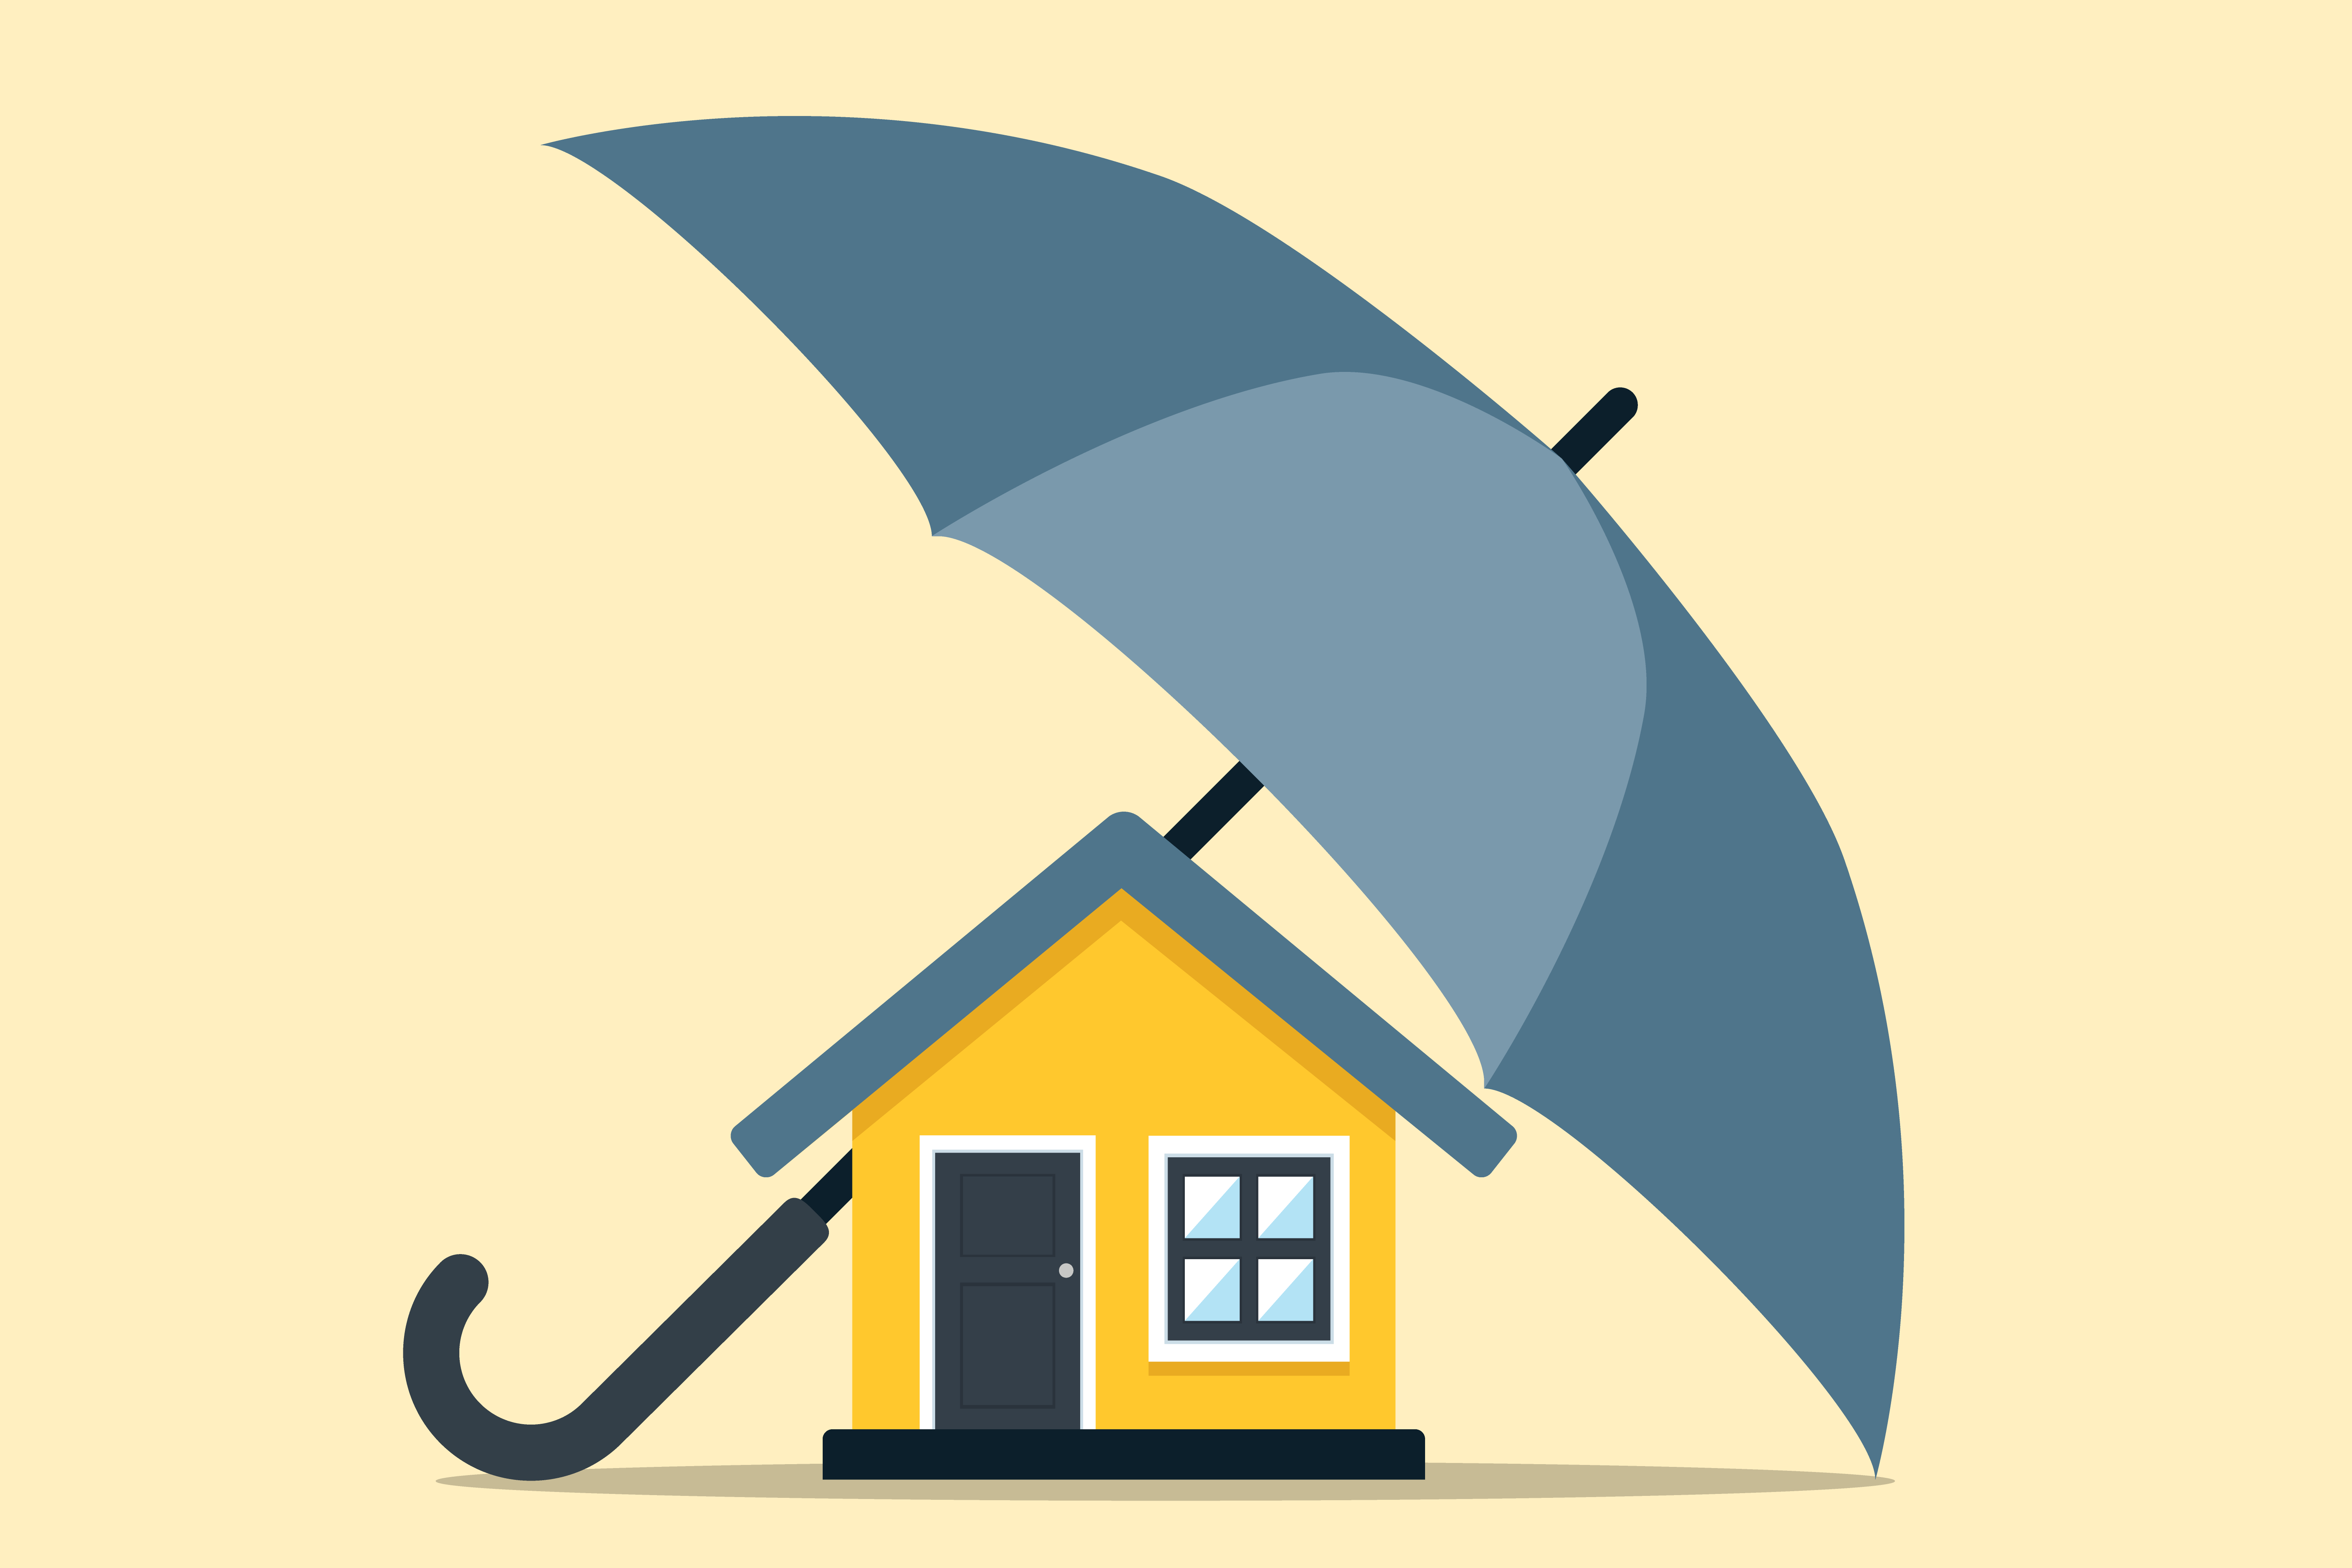


# Description
Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

The aim of the project is to build a predictive model to determine if a building will have an insurance claim during a certain period or not.

The model will be based on the building characteristics. The target variable, Claim, is a:

1 if the building has at least a claim over the insured period. 0 if the building doesn’t have a claim over the insured period.

# Data cleaning

In [35]:
# importing the data
import pandas as pd
import numpy as np
data= pd.read_csv('train_data.csv')

In [36]:
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [37]:
data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [38]:
# Calculate the mode of the 'Garden' column
garden_mode = data['Garden'].mode()[0]

# Fill missing values with the mode
data['Garden'].fillna(garden_mode, inplace=True)

count     7054.000000
mean      1883.727530
std       2278.157745
min          1.000000
25%        528.000000
50%       1083.000000
75%       2289.750000
max      20940.000000
Name: Building Dimension, dtype: float64


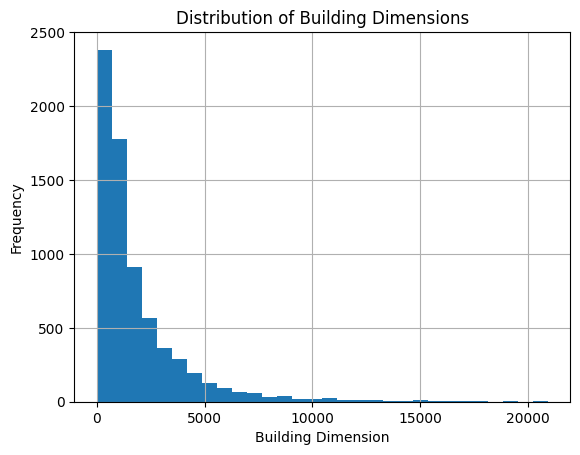

In [39]:
# let see the distribution of 'Building dimenstion' and clean it
import matplotlib.pyplot as plt

# Descriptive statistics
print(data['Building Dimension'].describe())

# Histogram
data['Building Dimension'].hist(bins=30)
plt.title('Distribution of Building Dimensions')
plt.xlabel('Building Dimension')
plt.ylabel('Frequency')
plt.show()


In [40]:
# Calculating the median of the 'Building Dimension' column
building_dimension_median = data['Building Dimension'].median()

# Filling missing values with the median
data['Building Dimension'].fillna(building_dimension_median, inplace=True)


In [41]:
data = data.drop(['Geo_Code'], axis=1)


In [42]:
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,0


In [43]:
data = data.drop(['NumberOfWindows'], axis=1)

count    6652.000000
mean     1964.456404
std        36.002014
min      1545.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2016.000000
Name: Date_of_Occupancy, dtype: float64


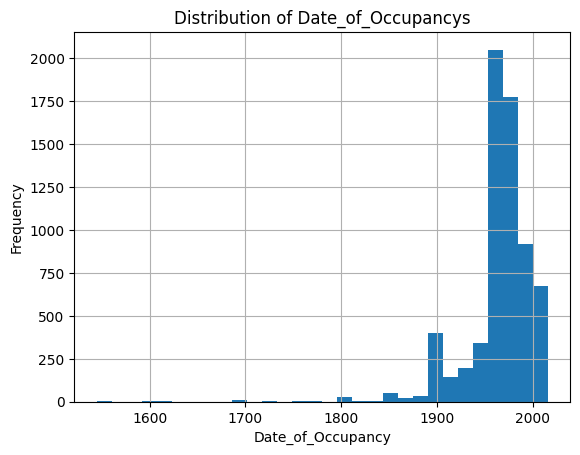

In [44]:
# let see the distribution of 'Date_of_Occupancy' and clean it
import matplotlib.pyplot as plt

# Descriptive statistics
print(data['Date_of_Occupancy'].describe())

# Histogram
data['Date_of_Occupancy'].hist(bins=30)
plt.title('Distribution of Date_of_Occupancys')
plt.xlabel('Date_of_Occupancy')
plt.ylabel('Frequency')
plt.show()


In [45]:
# Calculate the median of the 'Date_of_Occupancy' column
occupancy_median = data['Date_of_Occupancy'].median()

# Fill missing values with the median
data['Date_of_Occupancy'].fillna(occupancy_median, inplace=True)


In [46]:
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,0


In [47]:
data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
Claim                 0
dtype: int64

# Visualization

<ipython-input-48-38d746935d70>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=palettes[i])


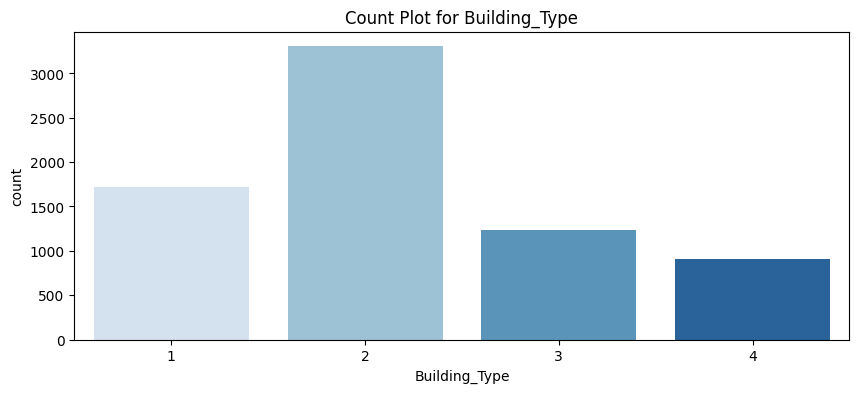

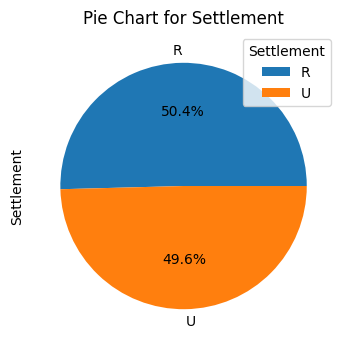

<ipython-input-48-38d746935d70>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=palettes[i])


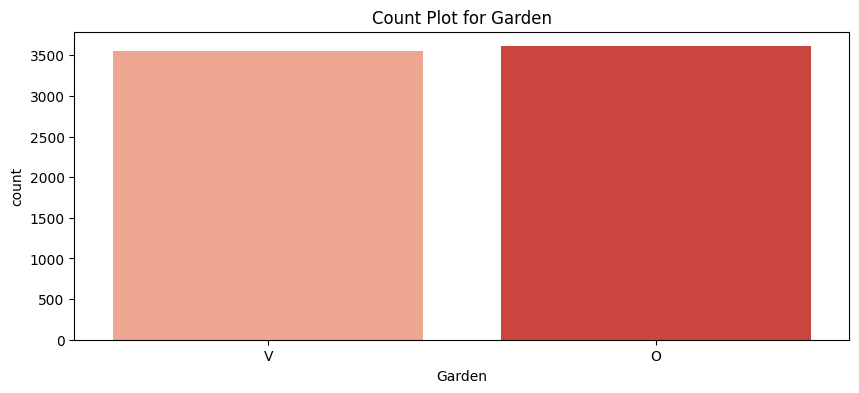

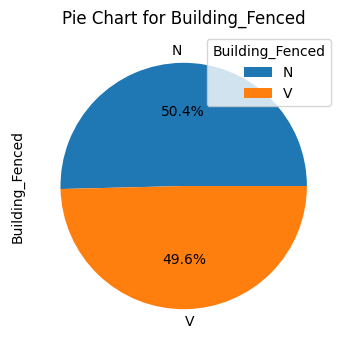

<ipython-input-48-38d746935d70>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=palettes[i])


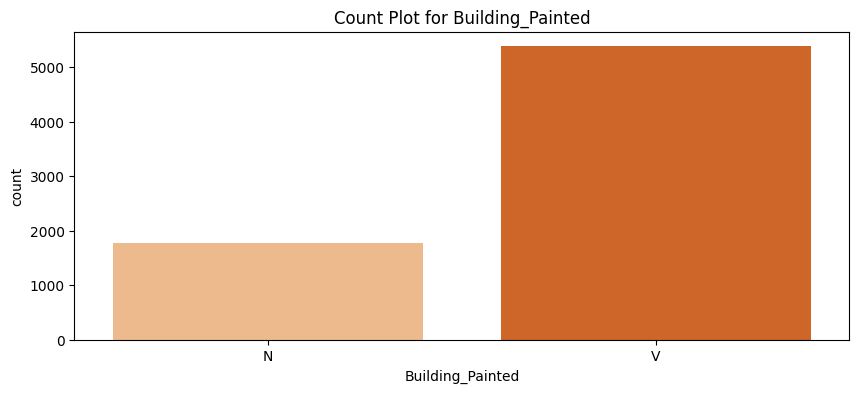

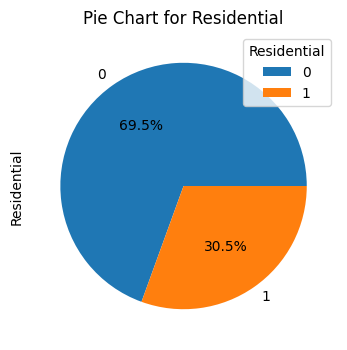

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Building_Type', 'Settlement', 'Garden', 'Building_Fenced', 'Building_Painted', 'Residential']
palettes = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges', 'Greys']

for i, column in enumerate(categorical_columns):
    plt.figure(figsize=(10, 4))

    # Useing countplot for even index and pie chart for odd index
    if i % 2 == 0:
        sns.countplot(data=data, x=column, palette=palettes[i])
        plt.title(f'Count Plot for {column}')
    else:
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Pie Chart for {column}')
        plt.legend(title=column, loc='upper right')

    plt.show()


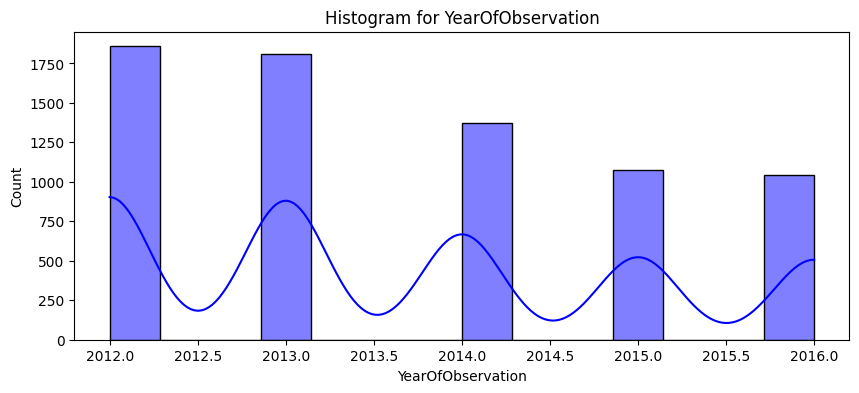

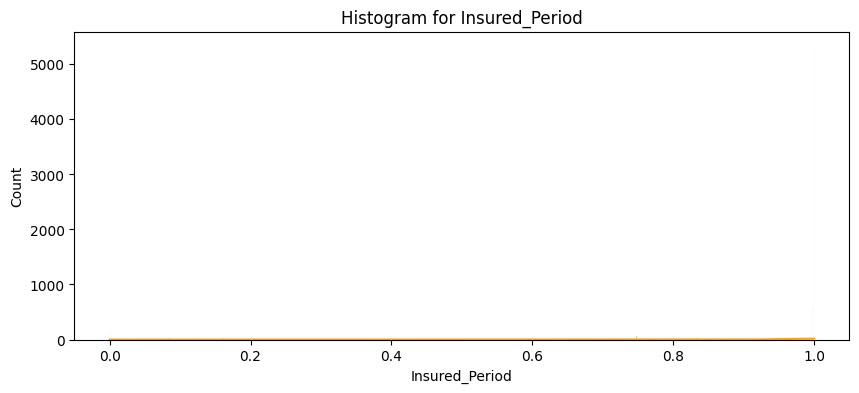

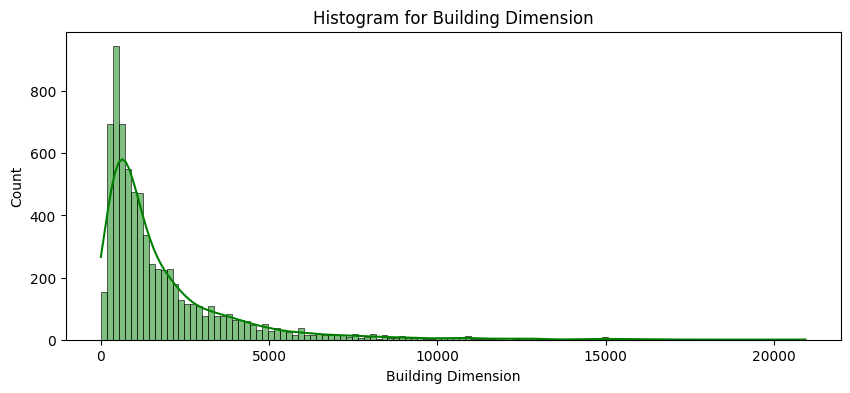

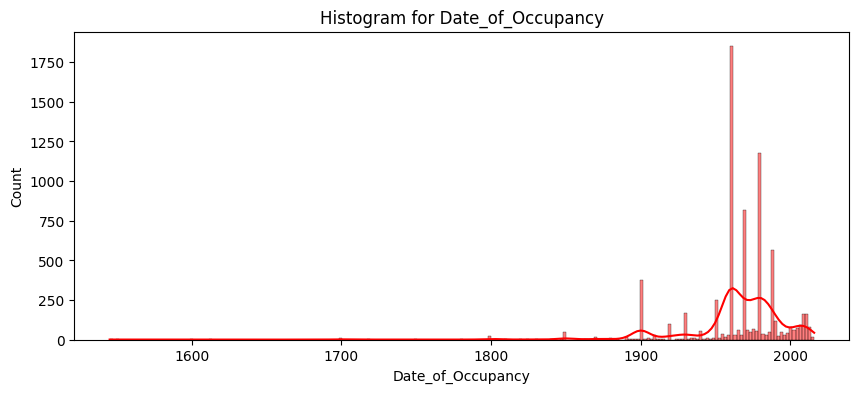

In [50]:
numerical_columns = ['YearOfObservation', 'Insured_Period', 'Building Dimension', 'Date_of_Occupancy']
colors = ['blue', 'orange', 'green', 'red', 'purple']

for column, color in zip(numerical_columns, colors):
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=column, kde=True, color=color)
    plt.title(f'Histogram for {column}')
    plt.show()


# Feature selection

In [51]:
# Correlation analysis allows us to understand the relationship between different variables in the  dataset
# Computeing the correlation matrix
corr_matrix = data.corr()

# Displaying the correlation matrix
print(corr_matrix)


                    YearOfObservation  Insured_Period  Residential  \
YearOfObservation            1.000000        0.025434    -0.040391   
Insured_Period               0.025434        1.000000    -0.037620   
Residential                 -0.040391       -0.037620     1.000000   
Building Dimension           0.010959        0.008822     0.056357   
Building_Type                0.005490       -0.017811     0.334039   
Date_of_Occupancy           -0.030230       -0.010523    -0.036885   
Claim                       -0.016367        0.088715     0.063509   

                    Building Dimension  Building_Type  Date_of_Occupancy  \
YearOfObservation             0.010959       0.005490          -0.030230   
Insured_Period                0.008822      -0.017811          -0.010523   
Residential                   0.056357       0.334039          -0.036885   
Building Dimension            1.000000       0.009184           0.196190   
Building_Type                 0.009184       1.000000      

<ipython-input-51-c481c847a77d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


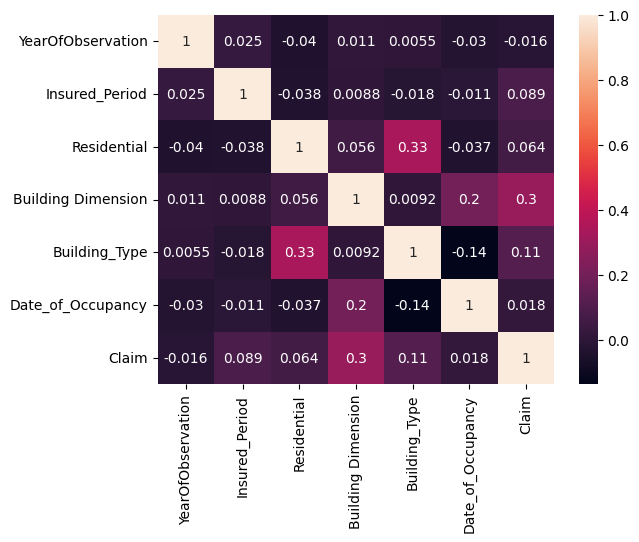

In [52]:
import seaborn as sns

# heatmap from the correlation matrix
sns.heatmap(corr_matrix, annot=True)

# Display the heatmap
plt.show()


The correlation matrix generated gives us some interesting insights:

- `Claim` has a positive correlation with `Building Dimension` (0.295558) and `Building_Type` (0.112168). This suggests that these features might be good predictors for `Claim`.
- `Residential` and `Building_Type` are positively correlated (0.334039), indicating that these two variables move in the same direction.
- `Date_of_Occupancy` and `Building_Type` are negatively correlated (-0.137001), suggesting that as one increases, the other decreases.





In [53]:
data.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim'],
      dtype='object')

In [54]:
numerical_features = ['YearOfObservation', 'Insured_Period', 'Building Dimension', 'Date_of_Occupancy']
categorical_features = ['Building_Type', 'Settlement', 'Garden', 'Building_Fenced', 'Building_Painted', 'Residential']

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# let  X is  feature matrix and y is  target variable
X = data[numerical_features + categorical_features]
y = data['Claim']

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes==object

# Get lists of categorical and numerical column names
categorical_cols = X.columns[categorical_feature_mask].tolist()
numerical_cols = X.columns[~categorical_feature_mask].tolist()

# Apply one-hot encoder to categorical columns
ohe = OneHotEncoder(drop='first', sparse=False)
X_cat = pd.DataFrame(ohe.fit_transform(X[categorical_cols]))
X_cat.columns = ohe.get_feature_names_out(input_features = categorical_cols)

# Concatenate numerical and categorical dataframes
X_encoded = pd.concat([X[numerical_cols], X_cat], axis=1)

clf = RandomForestClassifier()
clf.fit(X_encoded, y)

importances = clf.feature_importances_
feature_importances = pd.DataFrame({"Feature": X_encoded.columns, "Importance": importances})
feature_importances = feature_importances.sort_values("Importance", ascending=False)

print(feature_importances)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              Feature  Importance
2  Building Dimension    0.534007
3   Date_of_Occupancy    0.182779
0   YearOfObservation    0.101590
1      Insured_Period    0.073186
4       Building_Type    0.058647
5         Residential    0.020503
9  Building_Painted_V    0.016646
7            Garden_V    0.004636
8   Building_Fenced_V    0.004255
6        Settlement_U    0.003752


In [19]:
# The selected features  are Building Dimension ,Date_of_Occupancy,YearOfObservation,Insured_Period, Building_Type, and Residential

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define  features
features = ['Building Dimension', 'Date_of_Occupancy', 'YearOfObservation', 'Insured_Period', 'Building_Type', 'Residential']

# Define the  target
target = ['Claim']

# Separate features and target
X = data[features]
y = data[target]

# Define categorical and numerical features
categorical_features = ['Building_Type', 'Residential']
numerical_features = ['Building Dimension', 'Date_of_Occupancy', 'YearOfObservation', 'Insured_Period']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocessing the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=0)


# Model Training

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Define the  model
model = RandomForestClassifier(random_state=0)

# Train the  model
model.fit(X_train, y_train.values.ravel())


RandomForestClassifier(random_state=0)

In [58]:
from sklearn.metrics import accuracy_score

#  predictions on the test set
y_pred = model.predict(X_test)

#  the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy}")


Model accuracy: 0.7562849162011173


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the model
model = LogisticRegression(random_state=0)

# Train the  model
model.fit(X_train, y_train.values.ravel())

#  predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1099
           1       0.65      0.15      0.24       333

    accuracy                           0.78      1432
   macro avg       0.72      0.56      0.56      1432
weighted avg       0.76      0.78      0.73      1432



In [60]:
# Model Tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=0), param_grid)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")



Best parameters: {'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [61]:
from sklearn.linear_model import LogisticRegression

# Define the  model with the best parameters
model = LogisticRegression(C=1, penalty='l2', random_state=0)

# Train the  model
model.fit(X_train, y_train.values.ravel())


LogisticRegression(C=1, random_state=0)

# Model Evaluation

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{confusion_mat}")


              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1099
           1       0.65      0.15      0.24       333

    accuracy                           0.78      1432
   macro avg       0.72      0.56      0.56      1432
weighted avg       0.76      0.78      0.73      1432

Confusion Matrix: 
[[1073   26]
 [ 284   49]]


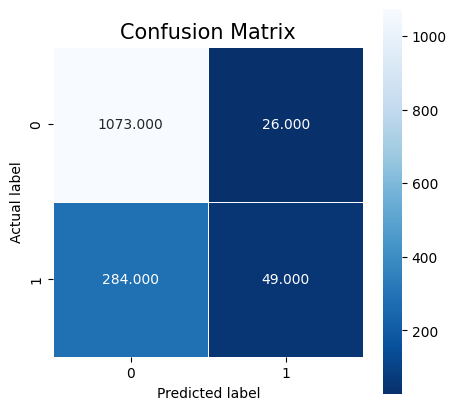

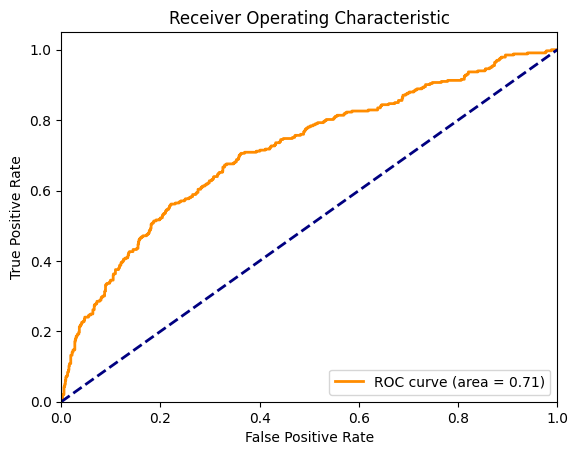

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming that 'model' is your trained model and 'X_test' and 'y_test' are your test data
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Predicting with a new  data

In [63]:
#lets preprocess the test data
# importing the test data
test_data = pd.read_csv('test_data.csv')

# Check for missing values
print(test_data.isnull().sum())




Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64


In [64]:
# Fill missing values in 'Garden' with the mode
garden_mode_test = test_data['Garden'].mode()[0]
test_data['Garden'].fillna(garden_mode_test, inplace=True)

# Fill missing values in 'Building Dimension' with the median
building_dimension_median_test = test_data['Building Dimension'].median()
test_data['Building Dimension'].fillna(building_dimension_median_test, inplace=True)

# Drop the 'Geo_Code' and 'NumberOfWindows' columns
test_data = test_data.drop(['Geo_Code'], axis=1)
test_data = test_data.drop(['NumberOfWindows'], axis=1)

# Fill missing values in 'Date_of_Occupancy' with the median
occupancy_median_test = test_data['Date_of_Occupancy'].median()
test_data['Date_of_Occupancy'].fillna(occupancy_median_test, inplace=True)

# Check for missing values again
print(test_data.isnull().sum())



Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
dtype: int64


In [65]:
# Define the features for the test data
X_test_data = test_data[features]

# Preprocess the features of the test data
X_test_data_preprocessed = preprocessor.transform(X_test_data)

In [66]:

predictions = model.predict(X_test_data_preprocessed)

# Create a new DataFrame with 'Customer Id' and 'Claim' columns
output = pd.DataFrame({'Customer Id': test_data['Customer Id'], 'Claim': predictions})

# Export the DataFrame to a CSV file
output.to_csv('./predictions.csv', index=False)


In [67]:
new_data=pd.read_csv('predictions.csv')

In [68]:
new_data.head()

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0
